In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset =pd.read_csv('data/breast_cancer.csv')

X = dataset.iloc[:,0:9]
y = dataset.iloc[:,9]

# 타겟 컬럼 계층화 (Stratify)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Train Data score :  0.634
Test Data score :  0.636
[[91  0]
 [52  0]]
precision_score :  0.3181818181818182
recall_score :  0.5
f1_score :  0.3888888888888889
SVC()
[[91  0]
 [52  0]]


c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


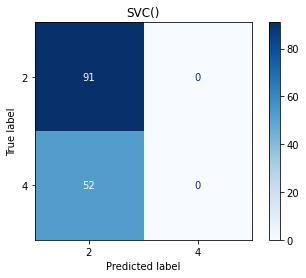

In [47]:
# 설정 x
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print('Train Data score : ', round(svc.score(X_train, y_train), 3))
print('Test Data score : ',  round(svc.score(X_test, y_test), 3))

prediction = svc.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print(confusion)

# 분류 알고리즘 평가
precision = precision_score(y_test, prediction, average='macro')
print('precision_score : ', precision)

recall = recall_score(y_test, prediction, average='macro')
print('recall_score : ', recall)

f1 = f1_score(y_test, prediction, average='macro')
print('f1_score : ', f1)

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [('SVC()', None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        svc, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


plt.show()


Train Data score :  1.0
Test Data score :  0.895
[[76 15]
 [ 0 52]]
precision_score :  0.8880597014925373
recall_score :  0.9175824175824177
f1_score :  0.8920646102752479


c:\Program Files\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


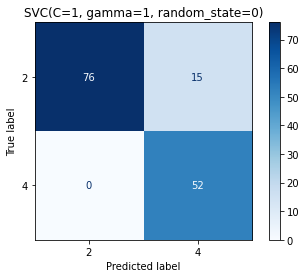

In [44]:
# 설정 o
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svc2 = SVC(C=1, gamma=1, random_state=0)
svc2.fit(X_train, y_train)

print('Train Data score : ', round(svc2.score(X_train, y_train), 3))
print('Test Data score : ',  round(svc2.score(X_test, y_test), 3))

prediction2 = svc2.predict(X_test)
confusion2 = confusion_matrix(y_true=y_test, y_pred=prediction2)
print(confusion2)

# 분류 알고리즘 평가
precision = precision_score(y_test, prediction2, average='macro')
print('precision_score : ', precision)

recall = recall_score(y_test, prediction2, average='macro')
print('recall_score : ', recall)

f1 = f1_score(y_test, prediction2, average='macro')
print('f1_score : ', f1)

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [('SVC(C=1, gamma=1, random_state=0)', None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        svc2, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

plt.show()


c:\Program Files\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


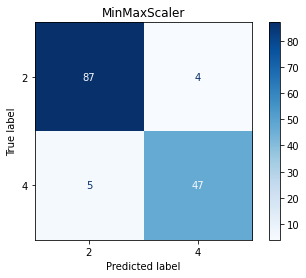

In [45]:
# MinMaxScaler 사용 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

prediction = svc.predict(X_test_scaled)

# 오차행렬 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [('MinMaxScaler', None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        svc, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

